# Projeto Final: Análise de Crédito (EBAC)

## **Tópicos**

  * [1. Introdução](#section-one)
  * [2. Exploração de dados](#section-two)
      * [2.1. Estrutura](#subsection-two-one)
      * [2.2. Schema](#subsection-two-two)
      * [2.3. Dados Faltantes](#subsection-two-three)
  * [3. Transformação e limpeza de dados](#section-three)
      * [3.1. Correção de Schema](#subsection-three-one)
      * [3.2. Remoção de dados faltantes](#subsection-three-two)
  * [4. Visualização de dados](#section-four)
      * [4.1. Visualizações categóricas](#subsection-four-one)
      * [4.2. Visualizações numéricas](#subsection-four-two)
  * [5. Storytelling](#section-five)



---

<a id="section-one"></a>
## 1\. Introdução

![budgeting2.png](attachment:118a650b-355f-4eb8-86d4-36ddc8f53b09.png "Uso de dados para explorar casos de inadimplência!")
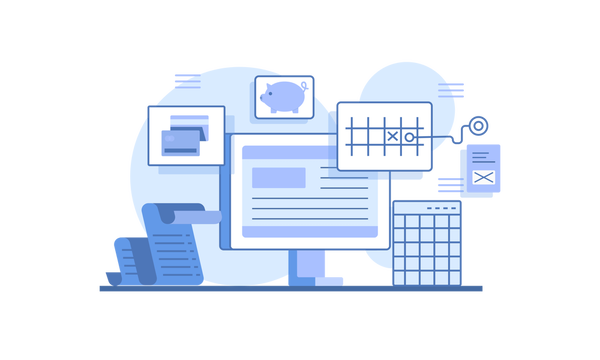


<a href="https://iconscout.com/illustrations/budgeting" target="_blank">Budgeting Illustration</a> by <a href="https://iconscout.com/contributors/iconscout">IconScout Store</a> on <a href="https://iconscout.com">IconScout</a>


Nesse projeto, iremos efetuar a exploração, manipulação, limpeza e visualização dos dados de um conjunto de dados de crédito, com foco na análise de associações da coluna 'default' com outras informações presentes no conjunto. Ao longo dessa análise, iremos buscar gerar insights sobre como prevêr possíveis casos de inadimplência e quem sabe, preveni-los. Por fim, apresentaremos esses insights e possíveis manobras para solucionar alguns dos problemas enfrentados por instituições de crédito.

> Todas ilustrações presentes neste notebook contém seus respectivos artistas logo abaixo.

---

<a id="section-two"></a>
## 2\. Exploração de Dados

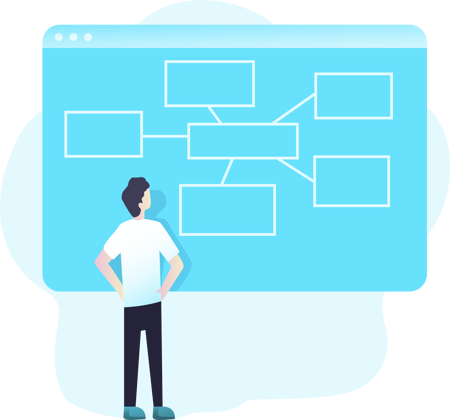

<a href="https://iconscout.com/illustrations/mind-map" target="_blank">Mind Map Illustration</a> by <a href="https://iconscout.com/contributors/manypixels-gallery">Manypixels Gallery</a> on <a href="https://iconscout.com">IconScout</a>

Vamos explorar dados de crédito presentes neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | Indica a idade do cliente em valor inteiro |
| sexo    | Indica o sexo do cliente, representado por 'M' se Masculino, e 'F' se Feminino |
| dependentes | Quantidade de dependentes que o cliente possui |
| escolaridade | Categoriza o cliente por seu nível de escolaridade: Sem Educação Formal, Ensino Médio, Graduação, Mestrado ou Doutorado |
| estado_civil | Classifica o cliente por seu estado civil: Solteiro, Casado ou Divorciado |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Vamos começar importando todas bibliotecas que serão necessárias e lendo os dados num dataframe `pandas`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('credito.csv', na_values='na')

Com os dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

<a id="subsection-two-one"></a>
### **2.1. Estrutura** 

In [3]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [4]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


<a id="subsection-two-two"></a>
### **2.2. Schema** 

In [5]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [6]:
df.tail()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


 - Colunas e seus respectivos tipos de dados.

In [7]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [8]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [9]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


<a id="subsection-two-three"></a>
### **2.3. Dados Faltantes** 

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [10]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos verificar quais colunas possuem dados faltantes.

In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [13]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [14]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [15]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


---

<a id="section-three"></a>
## 3\. Transformação e limpeza de dados

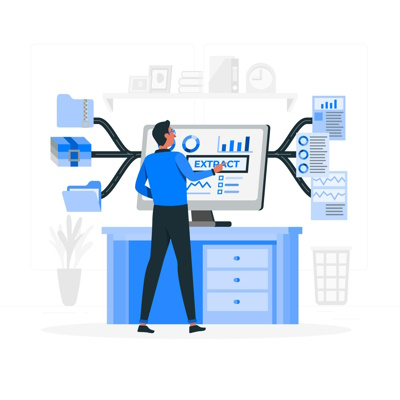

<a href="https://www.freepik.com/free-vector/data-extraction-concept-illustration_12325503.htm#query=data&position=24&from_view=search&track=robertav1">Image by storyset</a> on Freepik

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

<a id="subsection-three-one"></a>
### **3.1. Correção de Schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [16]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [17]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [18]:
# função lambda usando tabela ascii para formatar números decimais

br_float_format = lambda x: float(x.translate({46:None, 44:46}))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(br_float_format, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [19]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(br_float_format)
df['limite_credito'] = df['limite_credito'].apply(br_float_format)

Vamos agora organizar as colunas 'escolaridade', 'salario_anual' e 'tipo_cartao' em categorias, ordenando-os se possível.

In [20]:
df.escolaridade.unique()

array(['ensino medio', 'mestrado', 'sem educacao formal', nan,
       'graduacao', 'doutorado'], dtype=object)

In [21]:
df.escolaridade = pd.Categorical(df.escolaridade, ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado'], ordered = True)

Visualizando o resultado:

In [22]:
df.escolaridade.unique()

['ensino medio', 'mestrado', 'sem educacao formal', NaN, 'graduacao', 'doutorado']
Categories (5, object): ['sem educacao formal' < 'ensino medio' < 'graduacao' < 'mestrado' < 'doutorado']

---

In [23]:
df.salario_anual.unique()

array(['$60K - $80K', 'menos que $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [24]:
df.salario_anual = pd.Categorical(df.salario_anual, ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'], ordered = True)

Visualizando o resultado:

In [25]:
df.salario_anual.unique()

['$60K - $80K', 'menos que $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['menos que $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +']

---

In [26]:
df.tipo_cartao.unique()

array(['blue', 'gold', 'silver', 'platinum'], dtype=object)

In [27]:
df.tipo_cartao = pd.Categorical(df.tipo_cartao, ['blue', 'silver', 'gold', 'platinum'], ordered = True)

Visualizando o resultado:

In [28]:
df.tipo_cartao.unique()

['blue', 'gold', 'silver', 'platinum']
Categories (4, object): ['blue' < 'silver' < 'gold' < 'platinum']

---

Vamos descrever novamente o *schema*:

In [29]:
df.dtypes

id                            int64
default                       int64
idade                         int64
sexo                         object
dependentes                   int64
escolaridade               category
estado_civil                 object
salario_anual              category
tipo_cartao                category
meses_de_relacionamento       int64
qtd_produtos                  int64
iteracoes_12m                 int64
meses_inativo_12m             int64
limite_credito              float64
valor_transacoes_12m        float64
qtd_transacoes_12m            int64
dtype: object

 - Atributos **categóricos**.

In [30]:
df.select_dtypes(['object', 'category']).describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [31]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


<a id="subsection-three-two"></a>
### **3.2. Remoção de dados faltantes** 

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [32]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [33]:
df.shape

(7081, 16)

In [34]:
df[df['default'] == 0].shape

(5968, 16)

In [35]:
df[df['default'] == 1].shape

(1113, 16)

In [36]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [37]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


---

<a id="section-four"></a>
## 4\. Visualização de dados

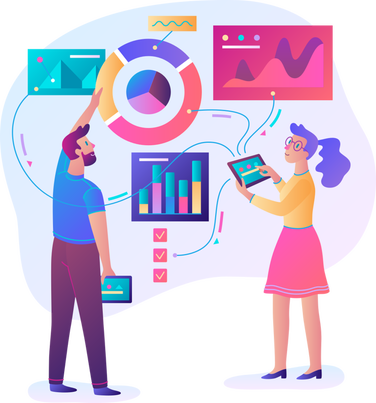

> <a href="https://iconscout.com/illustrations/data" target="_blank">Data Illustration</a> by <a href="https://iconscout.com/contributors/pixel-true-designs">Pixel True</a> on <a href="https://iconscout.com">IconScout</a>

Agora que os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então definindo um tema para nossas exibições e definindo dois novos datasets, isolando os clientes adimplentes e inadimplentes.

In [38]:
sns.set_style("whitegrid")
sns.color_palette("rocket")
sns.set_palette("rocket")

In [39]:
df_adimplente = df[df['default'] == 0]

In [40]:
df_inadimplente = df[df['default'] == 1]

<a id="subsection-four-one"></a>
### **4.1. Visualizações categóricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [41]:
df.select_dtypes(['category', 'object']).head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


- **Escolaridade**

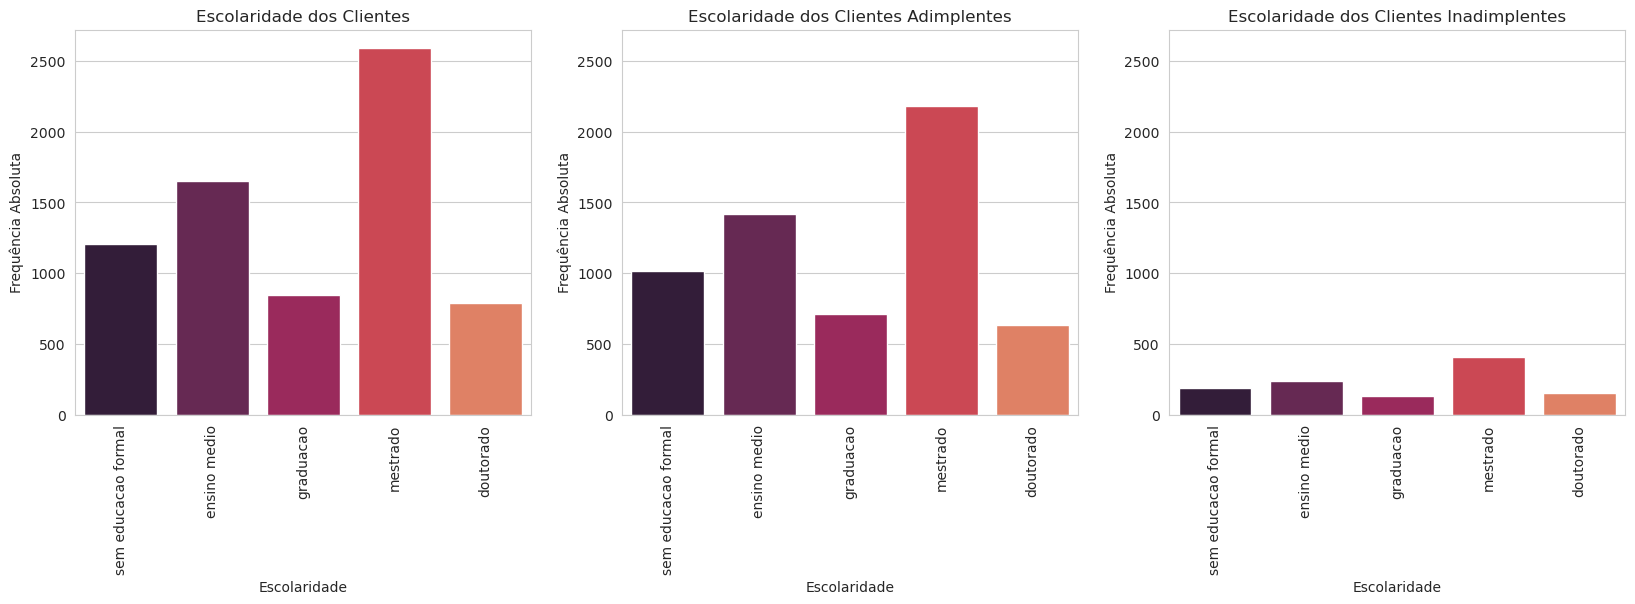

In [42]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('category').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

In [43]:
print(f"Clientes: \n{df.escolaridade.value_counts(normalize=True, sort=False)}", end="\n\n")
print(f"Clientes Adimplentes: \n{df_adimplente.escolaridade.value_counts(normalize=True, sort=False)}", end="\n\n")
print(f"Clientes Inadimplentes: \n{df_inadimplente.escolaridade.value_counts(normalize=True, sort=False)}", end="\n\n")

Clientes: 
sem educacao formal    0.170032
ensino medio           0.233442
graduacao              0.119192
mestrado               0.365909
doutorado              0.111425
Name: escolaridade, dtype: float64

Clientes Adimplentes: 
sem educacao formal    0.170576
ensino medio           0.237265
graduacao              0.119303
mestrado               0.366119
doutorado              0.106736
Name: escolaridade, dtype: float64

Clientes Inadimplentes: 
sem educacao formal    0.167116
ensino medio           0.212938
graduacao              0.118598
mestrado               0.364780
doutorado              0.136568
Name: escolaridade, dtype: float64



Quando visualizados através de seus níveis de ensino, há uma leve deslocação na frequência de clientes adimplentes e inadimplentes, porém por ser de apenas cerca de 2% na classe Ensino Médio e 3% na classe Doutorado, não há nada que afime categoricamente que há uma maior chance de o cliente se tornar inadimplente.

 - **Salário Anual**

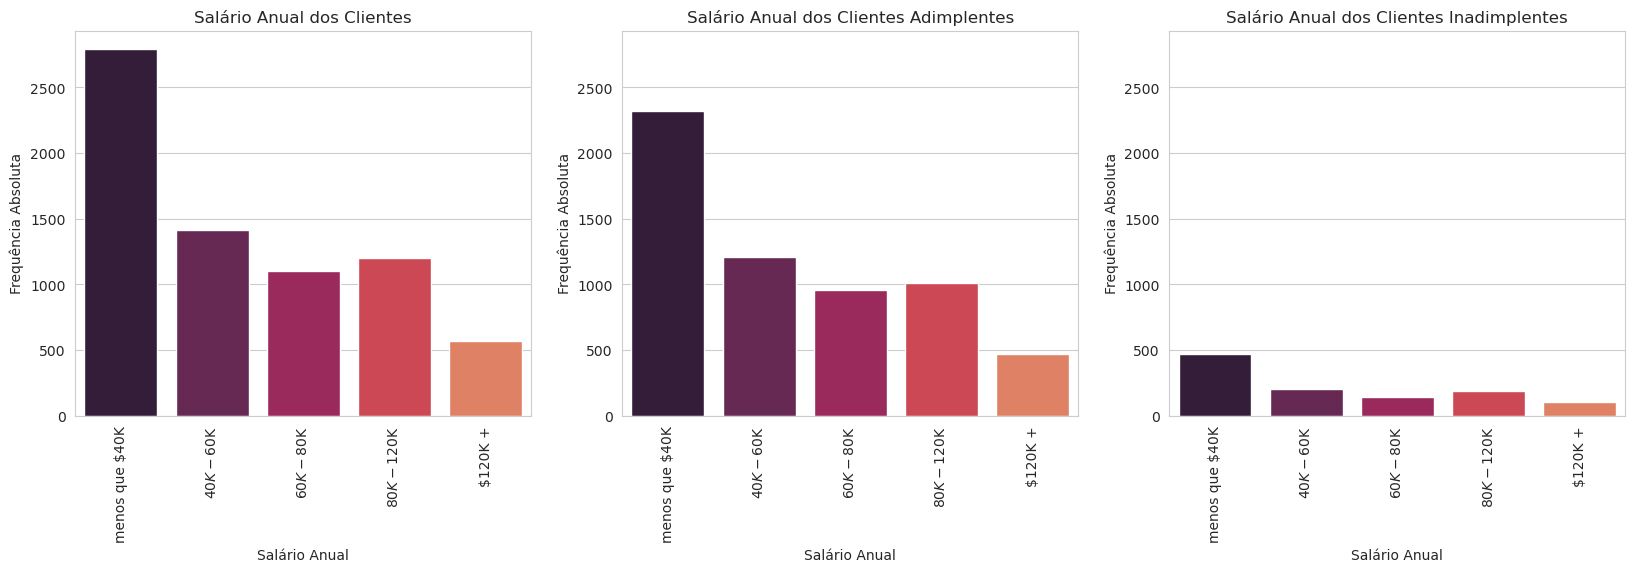

In [44]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Salário Anual', ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Os dados dos clientes vistos por suas respectivas faixas salariais se mostram razoavelmente consistentes através dos gráficos.

* **Tipo de Cartão**

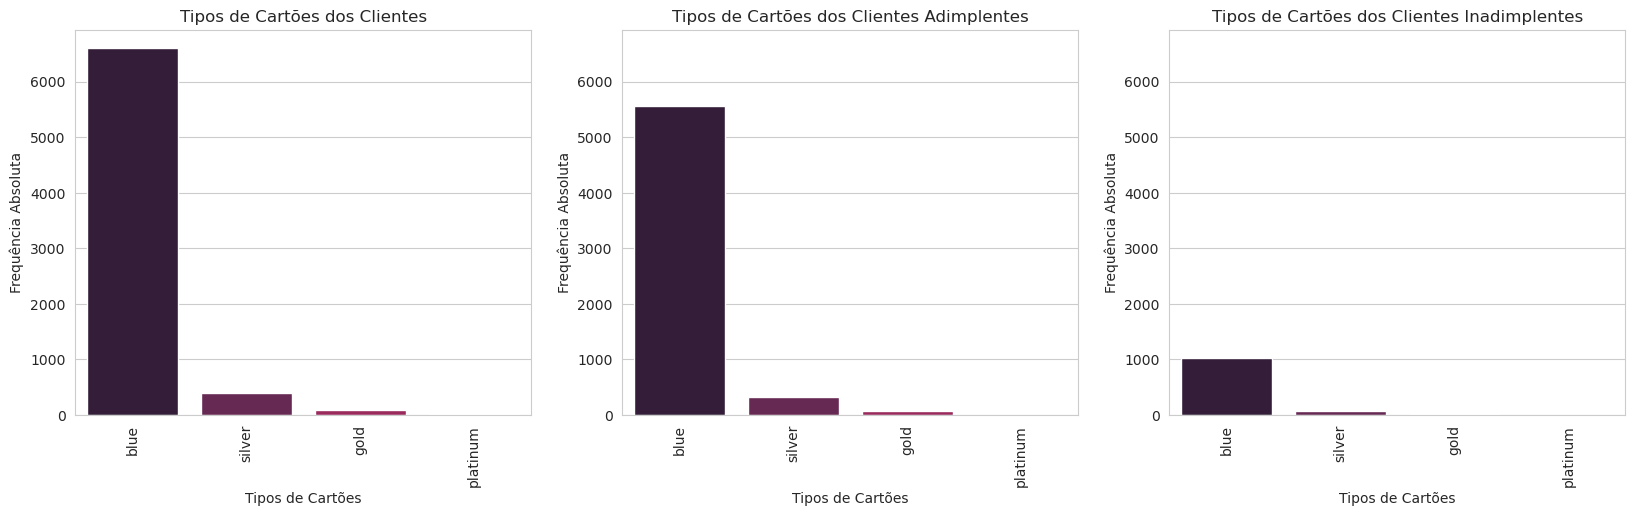

In [45]:
coluna = 'tipo_cartao'
titulos = ['Tipos de Cartões dos Clientes', 'Tipos de Cartões dos Clientes Adimplentes', 'Tipos de Cartões dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Tipos de Cartões', ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Os dados dos clientes, quando visualizados por seus respectivos tipos de cartões, se mostram consistentes.

* **Estado Civil**

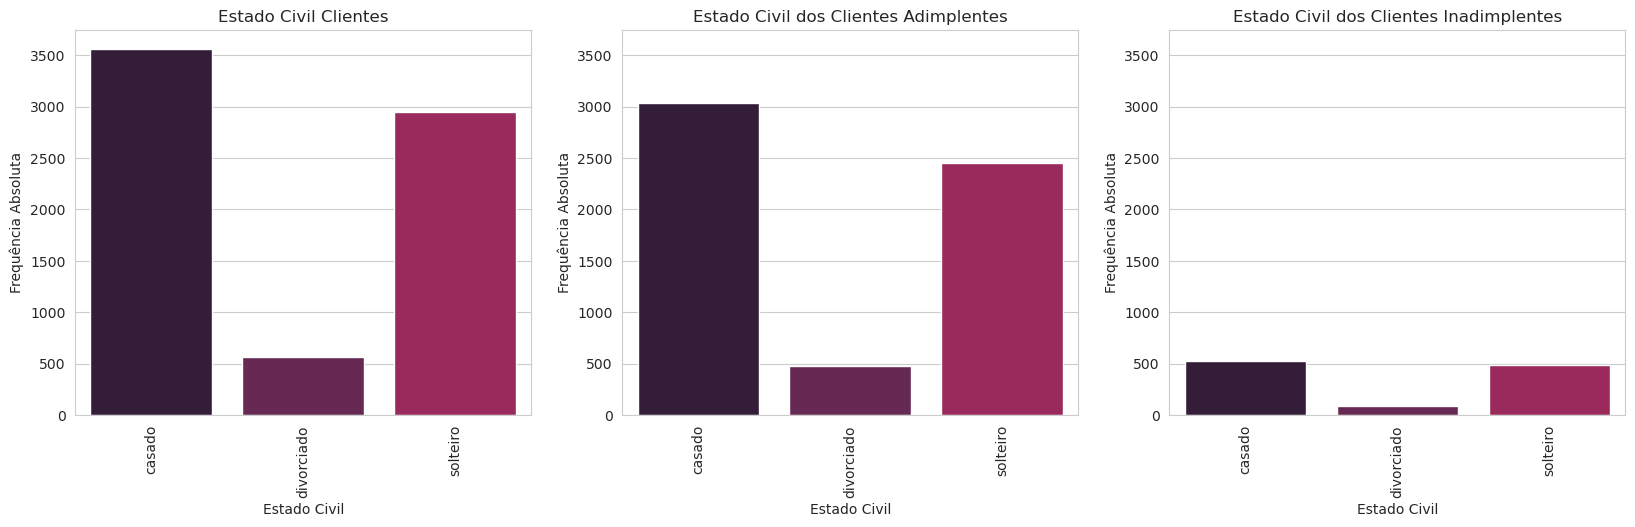

In [46]:
coluna = 'estado_civil'
titulos = ['Estado Civil Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Estado Civil', ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Podemos notar uma leve diferença quando observamos o número de pessoas casadas e solteiras que se encontram nas condições de adimplente e inadimplente, porém não é possível afirmar que há uma correlação. Para buscar essa informação, podemos explorar melhor essa relação através das tabelas de referência cruzada e o teste de x². 

- **Tabela de Referência Cruzada**

In [47]:
estado_civil_default_freq = pd.crosstab(df.estado_civil, df.default)
display(estado_civil_default_freq)

default,0,1
estado_civil,,
casado,3035,529
divorciado,477,92
solteiro,2456,492


- **Valores Esperados na Tabela Anterior em Caso de Independência Entre as Variáveis**

In [48]:
chi2, pval, dof, expected = chi2_contingency(estado_civil_default_freq)

expected_df = pd.DataFrame(expected)

display(np.round(expected_df))

,0,1
0,3004.0,560.0
1,480.0,89.0
2,2485.0,463.0


- **Teste do x² para Avaliar a Correlação das Variáveis**

In [49]:
print(round(chi2,2))

4.25


Pelo que podemos analisar pelo valor do teste de x² para uma tabela de 2x3, a diferença de 4.25 é insuficiente para determinar uma forte correlação entre as variáveis analisadas.

<a id="subsection-four-two"></a>
### **4.2. Visualizações numéricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [50]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


- **Maiores Influenciadores da Situação de Adimplência e Inadimpência dos Clientes**

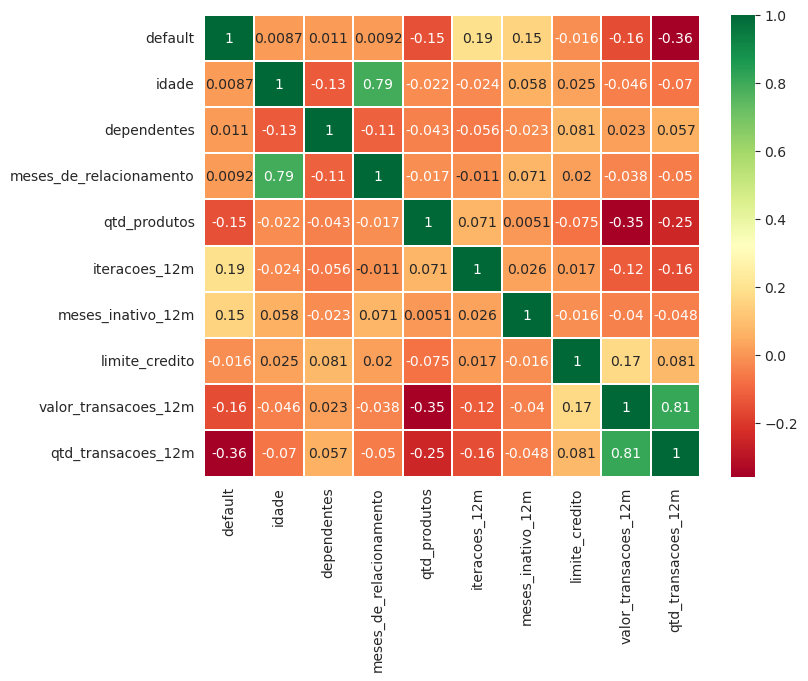

In [51]:
df_corr = df[['default','idade','dependentes','meses_de_relacionamento','qtd_produtos','iteracoes_12m',\
              'meses_inativo_12m','limite_credito','valor_transacoes_12m','qtd_transacoes_12m']]
sns.heatmap(df_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Pelo mapa de calor acima, o valor de transações e a quantidade de transações se mostram como dois dos maiores influenciadores da variável que estamos analisando, impactando em -0.16 e -0.36 respectivamente. Ademais, podemos notar que a variável 'qtd_produtos' também aparenta possuir ampla influência na variável analisada 'default'. Iremos explorar mais sobre essa influência em breve.

 - **Quantidade de Transações nos Últimos 12 Meses**

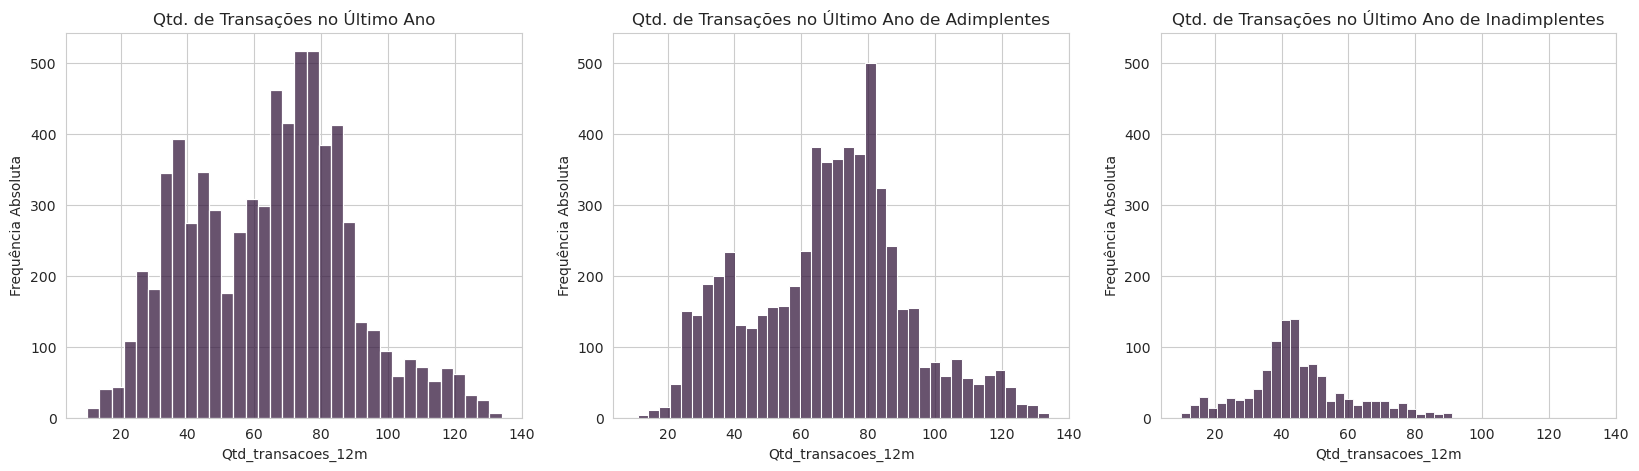

In [52]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Quando olhamos para o gráfico acima, podemos notar que há uma diferença na representação das transações de clientes adimplentes e inadimplentes. Existe uma queda no número de adimplentes que realizaram entre 40 e 60 transações no último ano, e é justamente este trecho que apresenta o pico do gráfico de inadimplentes.

 - **Valor das Transações nos Últimos 12 Meses**

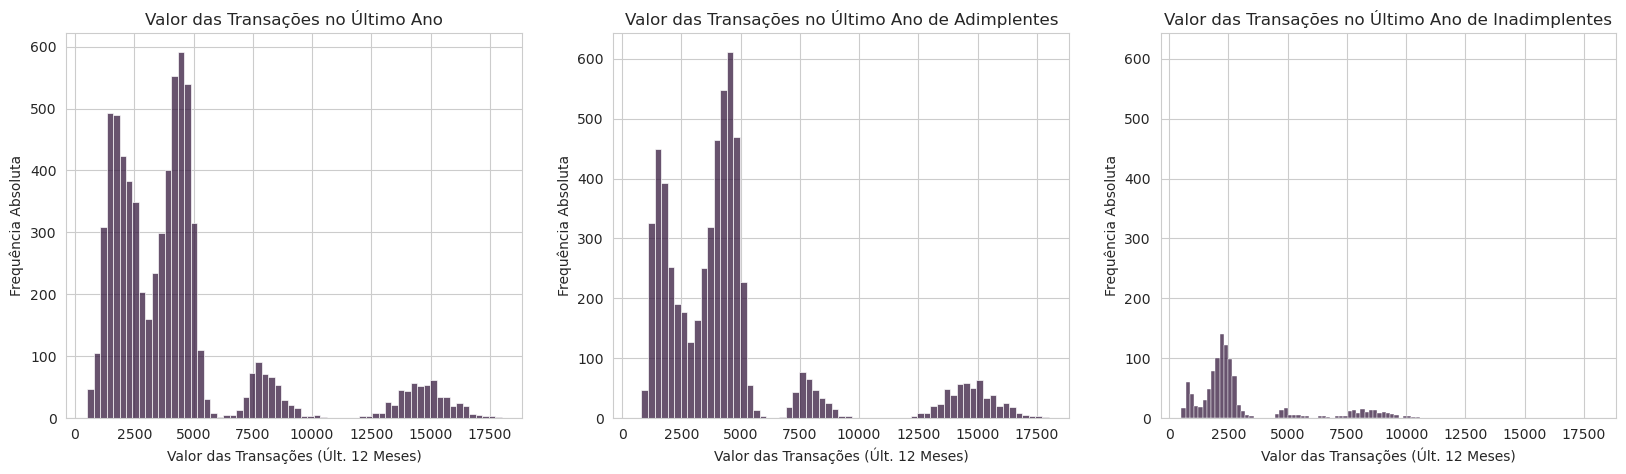

In [53]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Valor das Transações (Últ. 12 Meses)', ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Novamente, é possível notar uma assimetria entre os gráficos. Ao que parece, clientes que tenham gasto em torno de 2500 nos últimos 12 meses são mais propícios a se tornarem inadimplentes. Agora que encontramos duas variáveis que parecem ter correlação com a ocorrência de inadimplência, podemos relacioná-las em um único gráfico para visualizar se há uma interseção entre elas.

 - **Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses**

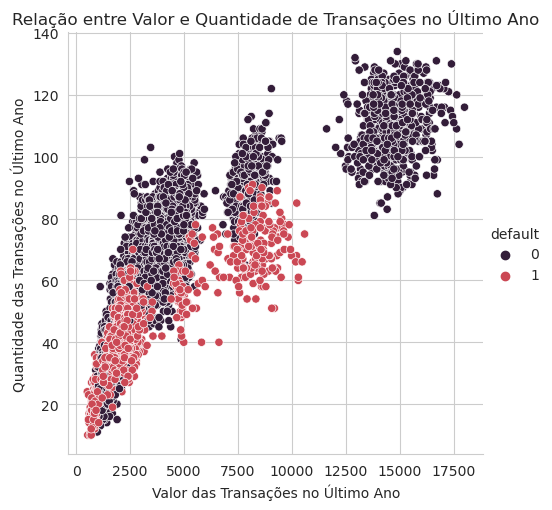

In [54]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default', palette=['#331D39', '#CB4854'])
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
)

Ao unirmos as duas variáveis anteriores, podemos notar que há um agrupamento dos clientes em situação de inadimplência. Em geral, os casos de clientes que tiveram, nos últimos 12 meses, valor de transações maior que 10.000 e número de transações maior que 100 que se tornaram inadimplentes são praticamente inexistentes.
Em seguida, vamos explorar melhor a distribuição das variáveis acima.

- **Explorando Distribuição de Quantidade de Transações**

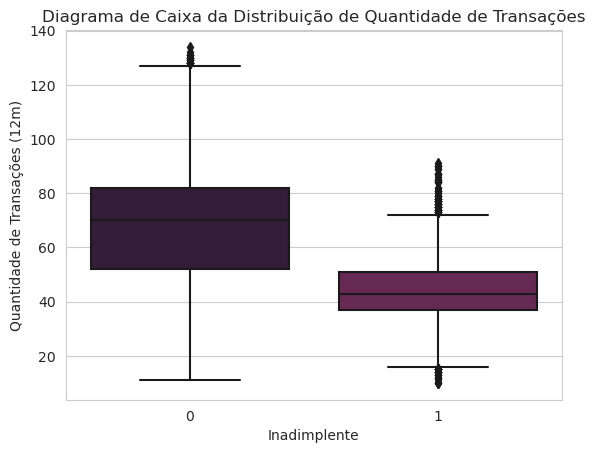

In [55]:
sns.boxplot(data=df, x='default', y='qtd_transacoes_12m')
plt.title('Diagrama de Caixa da Distribuição de Quantidade de Transações')
plt.xlabel('Inadimplente')
plt.ylabel('Quantidade de Transações (12m)')
plt.show()

Ao olharmos a distribuição através do boxplot acima, podemos confirmar que há indícios de que a quantidade de transações tem correlação com a incidência de inadimplência. Não há sobreposição entre o IQR(Inter Quartile Range) superior(Q3) dos inadimplentes e inferior(Q1) dos adimplentes. 

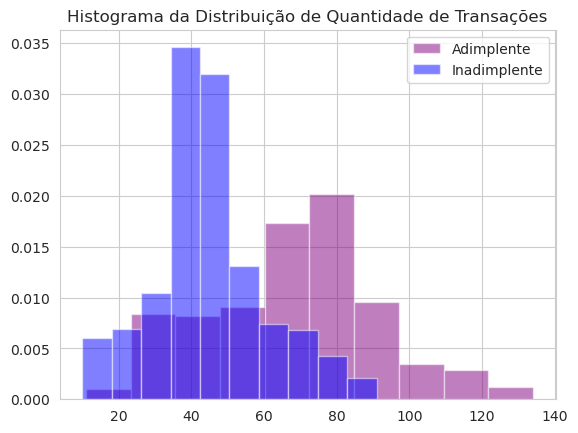

In [56]:
plt.hist(df_adimplente.qtd_transacoes_12m, color='purple', label="Adimplente", alpha=0.5, density=True)
plt.hist(df_inadimplente.qtd_transacoes_12m, color='blue', label="Inadimplente", alpha=0.5, density=True)
plt.title('Histograma da Distribuição de Quantidade de Transações')
plt.legend()
plt.show()


Podemos notar que, normalizando as amostras para obtermos perspectivas mais precisas, a distribuição de quantidade de transações nos últimos 12 meses se mostra inclinada para a direita, demonstrando tendência de menor ocorrência de inadimplência em paralelo ao crescimento de quantidade de transações. Em seguida vamos explorar a distribuição dos valores de transações nos últimos 12 meses.

- **Explorando Distribuição dos Valores de Transações**

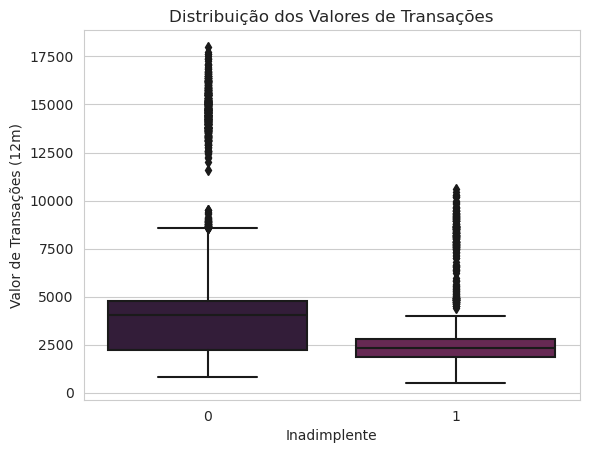

In [57]:
sns.boxplot(data=df, x='default', y='valor_transacoes_12m')
plt.title('Distribuição dos Valores de Transações')
plt.xlabel('Inadimplente')
plt.ylabel('Valor de Transações (12m)')
plt.show()

Assim como na distribuição anterior, podemos notar que há uma ampla diferença entre os grupos. É possível dizer que há sim uma associação entre a incidência de inadimplência e o valor das transações nos últimos 12 meses.

- **Explorando Distribuição de Clientes por Limite de Crédito**

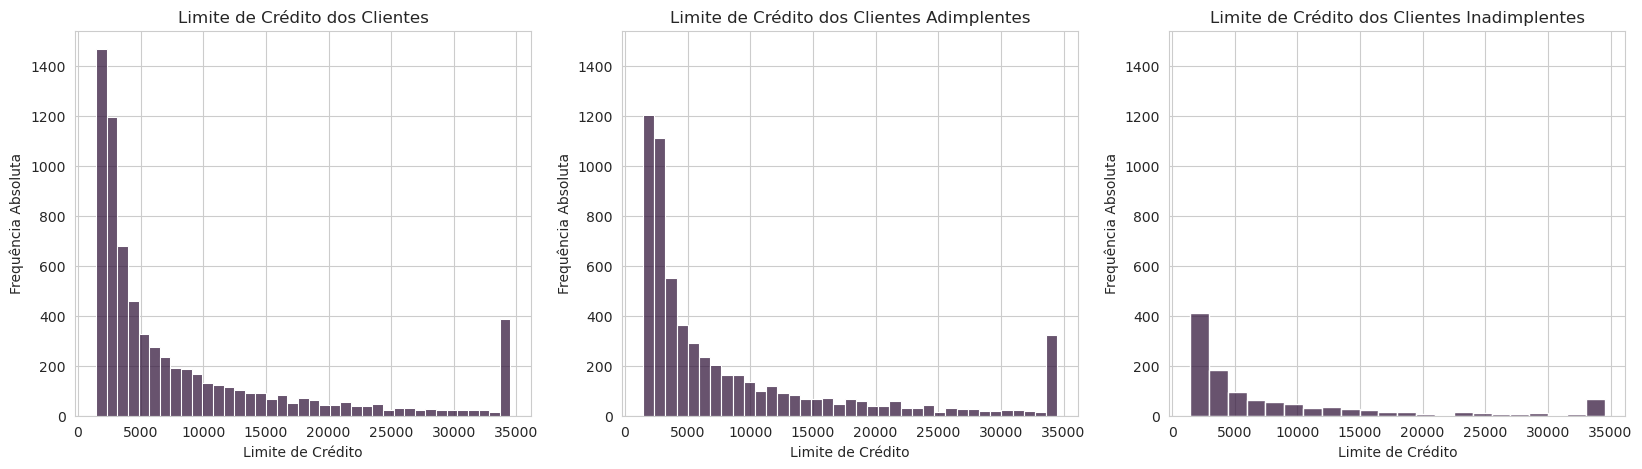

In [58]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito dos Clientes', 'Limite de Crédito dos Clientes Adimplentes', 'Limite de Crédito dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Limite de Crédito', ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

O gráfico de inadimplentes aparenta ter um declínio mais abrupto, vamos investigar na sequência se esse impacto é perceptível ao examinar a coluna em um histograma.

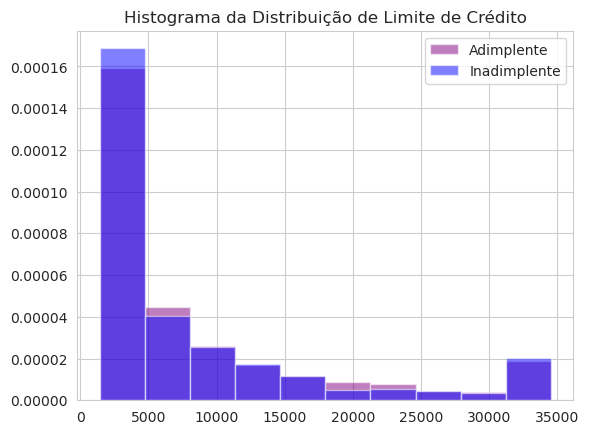

In [59]:
plt.hist(df_adimplente.limite_credito, color='purple', label="Adimplente", alpha=0.5, density=True)
plt.hist(df_inadimplente.limite_credito, color='blue', label="Inadimplente", alpha=0.5, density=True)
plt.title('Histograma da Distribuição de Limite de Crédito')
plt.legend()
plt.show()

 Ao sobrepor os gráficos, normalizando-os primeiramente, podemos notar que há grande similaridade em toda sua extensão. Concluí-se então que não há relação entre os valores de limite de crédito dos clientes e sua situação de inadimplência.

- **Clientes Organizados por Quantidade de Produtos**

Como prometido ao analisarmos o mapa de calor do dataset, iremos agora analisar se há ligação da quantidade de produtos de um cliente com sua situação de inadimplência.

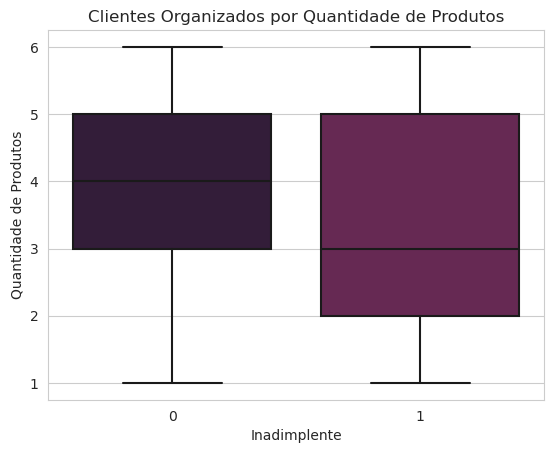

In [60]:
sns.boxplot(data=df, x='default', y='qtd_produtos')
plt.title('Clientes Organizados por Quantidade de Produtos')
plt.xlabel('Inadimplente')
plt.ylabel('Quantidade de Produtos')
plt.show()

Apesar de os clientes inadimplentes apresentarem IQR inferior(Q3) no valor de 3 produtos, valor equivalente ao mediano entre os inadimplentes, há ainda grande sobreposição entre as distribuições, tornando a avaliação de influência inclonclusiva.

---

<a id="section-five"></a>
## 5\. Storytelling

Ao explorarmos o dataset da análise de crédito, identificamos duas variáveis como amplos influenciadores na incidência de inadimplência, e demonstramos essa correlação ao longo de gráficos de variados tipos, tudo para facilitar a visualização dos casos que comprovam a nossa teoria de que os valores e quantidades de transações feitas por um cliente estão associados a incidência de inadimplência de clientes.

Portanto, indicaria que fosse feito um levantamento dos clientes que possuem dados de valor de transações e quantidade de transações semelhante aos casos acima analisados, e que então, busquem encontrar um caminho através de suporte ao cliente e opções de financiamento, para que estes clientes não se tornem novos casos de inadimplência.

Fim.


____